# COVID-19 disease simulation using SIR epidemic model.


## Case study : Simulating the progression of the COVID-19 disease in Cameroon using SIR models

This [paper](https://hal-amu.archives-ouvertes.fr/hal-02941632/document) analyzes the evolution of COVID-19 in Cameroon from March 6 to April 10 in 2020 using SIR framework. 
**Download the data** from [here](https://doi.org/10.6084/m9.figshare.12613649.v1) into numpy arrays using `numpy.genfromtxt` or other methods. 
First, I recommend to read the head of the data using `!head`. You may want to revisit File I/O section in Numpy_intermediate.ipynb. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# your code for reading csv file
data = np.genfromtxt('../corona.csv', delimiter=';', names=True, dtype=None)

# or you can read data by using pd.read_csv

C:\Users\esshi\AppData\Local\Temp\ipykernel_19664\2909896825.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt('../corona.csv', delimiter=';', names=True, dtype=None)


In [4]:
data.shape

(36,)

In [5]:
confirmed = data['confirmed']
death = data['death']
recovered = data['recovered']

**Plot the evolution** of the coronavirus disease in Cameroon. Make sure the graph has labels, title and legend.
The data contains the dates of the period. Instead of the colum of dates, use days from the beginning of the period. For example, x-axis can be labeled as ‘Time/days from 03/06/2020’.

In [6]:
t = list(range(len(data)))

C:\Users\esshi\AppData\Local\Temp\ipykernel_19664\3139714322.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


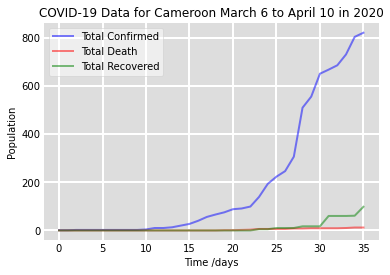

In [7]:
# your code for plotting the covid cases in Cameroon
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Total Confirmed')
ax.plot(t, death, 'r', alpha=0.5, lw=2, label='Total Death')
ax.plot(t, recovered, 'g', alpha=0.5, lw=2, label='Total Recovered')

ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_title('COVID-19 Data for Cameroon March 6 to April 10 in 2020')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Active cases are defined as the following:

> Active cases = cumulative confirmed cases - cumulative recovered - cumulative deaths

**Compute the number of active cases**, store it at `active_cases` and plot it. Note that the data are already cumulative.

C:\Users\esshi\AppData\Local\Temp\ipykernel_19664\2364552867.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


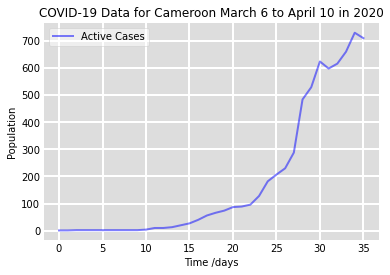

In [8]:
# Your code here.
active_cases = confirmed - death - recovered

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, active_cases, 'b', alpha=0.5, lw=2, label='Active Cases')

ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_title('COVID-19 Data for Cameroon March 6 to April 10 in 2020')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Now, using their estimated parameter values of the SIR model and initial conditions, **plot the simulation results** of the epidemic model. (I.e., reproduce the Fig 7 in their paper.) 

First, **define SIR differential equations**. See equation (5) from the paper. 

In [9]:
def dydt(y, t, params):
    """
    Returns the SIR model differential equations.
    """
    beta, gamma = params
    S, I, R = y
    
    # Your code here.
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Initial conditions used in their paper are given in the next cell.

In [10]:
# Total population.
N = 25216237

# Initial number of infected .
I0 = 1

# Initial removed individuals.
R0 = 0

# Initial susceptible individuals (everyone is susceptible to infection initially).
S0 = N - I0 - R0

# Initial conditions.
y0 = (S0, I0, R0)

Estimated parameter values are given below.

In [11]:
# Contact rate(beta) and mean recovery/removal rate (gamma), (in 1/days).
beta, gamma = 0.615, 0.393
print("R0:", round(beta/gamma,3))

R0: 1.565


**Set the number of time points** you want to simulate (in days).

In [12]:
# Your code here.
time_step = list(range(80))

It is time to solve the ODE using parameters, Initial conditions and time period defined above.  
**Perfom ODE simulations** using the solver `odeint` contained in the Python module `scipy.integrate`. To use this, please refer to the SciPy_basics.ipynb.
You can implement your own numerical integration function using Runge–Kutta methods or Euler methods. 

In [13]:
from scipy.integrate import odeint

The following code integrates the SIR equations over the time step.

In [14]:
params = [beta, gamma]
result = odeint(dydt, y0, time_step, args=(params,))
S, I, R = result.T

**Plot the curves** $S(t)$, $I(t)$ and $R(t)$.

C:\Users\esshi\AppData\Local\Temp\ipykernel_19664\2696878410.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


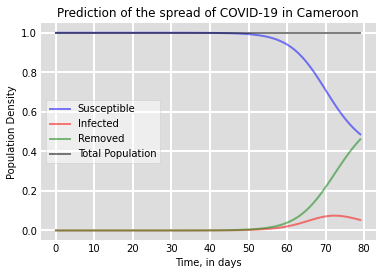

In [15]:
# Your code here.

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(time_step, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(time_step, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(time_step, R/N, 'g', alpha=0.5, lw=2, label='Removed')
ax.plot(time_step, (S+I+R)/N, 'k', alpha=0.5, lw=2, label='Total Population')

ax.set_xlabel('Time, in days')
ax.set_ylabel('Population Density')
ax.set_title('Prediction of the spread of COVID-19 in Cameroon')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

**Plot the simulation results with the dataset** and see how accurate their estimations are.

In the SIR model, $I(t)$ is considered to be the number of active cases at time $t$.

C:\Users\esshi\AppData\Local\Temp\ipykernel_19664\2466972390.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


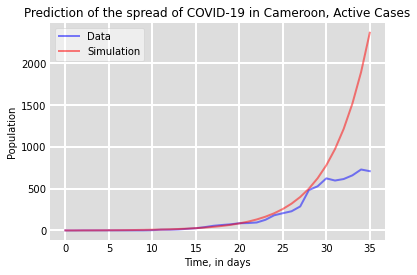

In [16]:
# Your code here.

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, active_cases, 'b', alpha=0.5, lw=2, label='Data')
ax.plot(t, I[t], 'r', alpha=0.5, lw=2, label='Simulation')

ax.set_xlabel('Time, in days')
ax.set_ylabel('Population')
ax.set_title('Prediction of the spread of COVID-19 in Cameroon, Active Cases')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

<hr>
<font face="verdana" style="font-size:30px" color="blue">---------- Optional Advanced Material ----------</font>

## Example: France's COVID-19 data

Now, let's use the data of France's COVID-19 active cases then predict the evolution of the disease in future days. 

`fr_active_cases` contains the number of active cases data of France from January 22 to March 23 in 2020.

In [17]:
fr_active_cases = \
np.array([0, 0, 2, 3, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11,
9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 5, 25, 44, 86, 116, 176,
188, 269, 359, 632, 926, 1095, 1178, 1739, 2221, 2221, 3570, 4366,
4396, 6473, 7492, 8883, 10616, 12150, 13708, 13144, 13144.0, 16796,
17923, 20002, 22511, 25269, 29561, 30366, 33599, 39161])

Consider the information:

*   Total population in France : 65241903
*   Contact rate : 0.301 (in 1/days)
*   Mean recovery/removal rate : 0.143 (in 1/days)
*   France announced the beginning of lockdown at March 17, noon. (After this day, we expect the contact rate ,$\beta$, was reduced abruptly.)

Do: 

1. Compute the basic reproduction rate $R_0$ and describe its meaning. 

2. Plot the simulated number of active case using the SIR model and compare it with the plot of Frances's data. Plot a vertical line to mark the day that the lockdown measure was announced. (Index for March 17 is 55.)

3. Based on the predicted evolution of the disease, discuss the effectiveness of the lockdown measure. (Simulation result corresponds to the scenario that no measures were taken to curb the spread of COVID-19.)

4. Compare the simulation result using the different parameter set given below. Discuss its implication.
    *   Contact rate : 0.26 (in 1/days)
    *   Mean recovery/removal rate : 0.1 (in 1/days)

In [18]:
# Your code here.
beta, gamma =0.301, 0.143
R0 = beta/gamma
print("R0: {} \n=> On average, an infectious individual infects {} susceptible individuals during the period.".format(R0, round(R0,2)) )

R0: 2.104895104895105 
=> On average, an infectious individual infects 2.1 susceptible individuals during the period.


C:\Users\esshi\AppData\Local\Temp\ipykernel_19664\2165622102.py:36: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


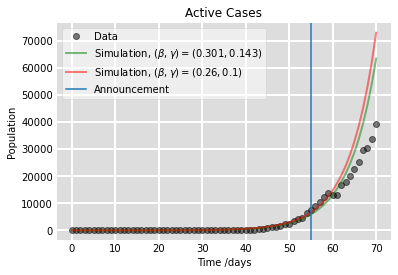

In [19]:
# Your code here. 

# Total population.
N = 65241903

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Initial conditions.
y0 = (S0, I0, R0)

t = list(range(len(fr_active_cases)))

# fitting result.
result = odeint(dydt, y0, t, args=((0.301, 0.143),))
S, I, R = result.T

result2 = odeint(dydt, y0, t, args=((0.26, 0.1),))
S2, I2, R2 = result2.T

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, fr_active_cases , 'ko', alpha=0.5, lw=2, label='Data')
ax.plot(t, I, 'g', alpha=0.5, lw=2, label=r'Simulation, $(\beta, \gamma) = (0.301, 0.143)$')
ax.plot(t, I2, 'r', alpha=0.5, lw=2, label=r'Simulation, $(\beta, \gamma) = (0.26, 0.1)$')
ax.axvline(55, label = 'Announcement')

ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_title('Active Cases')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()